# Can a computer learn if we're going to detect gravitational waves?

All experiments have selection effects. Some sources are easier to detect than others which distorts the population of sources we observe (this crucial in astronomy! Surveys are typically flux limited). In order to decided if a feature in the observed population of objects is telling us something new about reality, we need to understand and model our selection effects (for instance: it would be wrong to say that all stars are close by just because we can't observe those that are very far!). In observational astronomy, this is known as Malmquist bias and was first formulated in 1922.

The goal here is to machine-learn the LIGO detectability: can we predict if a gravitational-wave source will be detected?

This dataset contains simulated gravitational-wave signals from merging black holes (careful the file size is >1 GB). If you've never seen them, the .h5 format is a highly optimized storage strategy for large datasets. It's amazing. In python, you can read it with h5py.

In particular, each source has the following features:

- mtot: the total mass of the binary
- q: the mass ratio
- chi1x, chi1y, chi1z, chi2x, chi2y, chi2z: the components of the black-hole spins in a suitable reference frame.
- ra, dec: the location of the source in the sky
- iota: the inclination of the orbital plane'
- psi: the polarization angle (gravitational waves have two polarization states much like light)
- z: the redshift

The detectability is defined using the snr (signal-to-noise ratio) computed with a state-of-the-art model of the LIGO/Virgo detector network. Some (many?) of you will have studied this in the gravitational-wave class; see here for a nice write-up. All you need to know now is that we threshold the snr values and assume that LIGO will (not) see a source if snr>12 (snr<12). The resulting 0-1 labels are reported in the det attribute in the dataset.

Today's task is to train a classifier (you decide which one!) and separate sources that are detectables from those that aren't.

Be creative! This is a challenge! Let's see who gets the higher completeness and/or the smaller contamination (on a validation set, of course, careful with overfitting here).

## Tips:

- You can downsample the data for debugging purposes
- You can also use only some of the features.
- Plot ROC curves

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [38]:
# Import data
InFileName = "/home/alessia_pozzi/Astrostatistic/20_Classification/sample_2e7_design_precessing_higherordermodes_3detectors.h5"

data = {}
with h5py.File(InFileName, "r") as InFile:
    keys = ['mtot', 'q', 'chi1x', 'chi1y', 'chi1z', 'chi2x', 'chi2y', 'chi2z', 'ra', 'dec', 'iota', 'psi', 'z', 'snr', 'det']
    for key in keys: 
        data[key] = InFile[key][:1000]

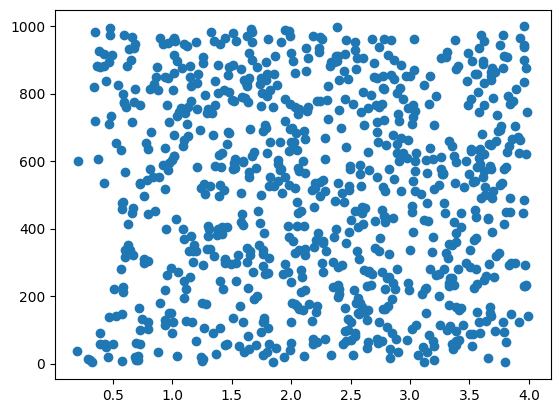

In [45]:
plt.scatter(data['z'][data['det']==0], data['mtot'][data['det']==0], marker = 'o')

## Other ideas (optional)

- Using the same data, we could run a regressor on snr instead of a classifier on det. We can then threshold the predictions (instead of tresholding the data like we're doing now). Would this give a better performance?
- How about trying to reduce the dimensionality of the dataset with a PCA-type algorithm to ease the classification problem?